In [1]:
# Regresión Líneal Simple
# Prediccion de precios de venta

# https://github.com/gonzalezgouveia/clases-youtube/tree/main/proyecto-house-price
# https://www.youtube.com/watch?v=b7gOUbSmGIY&t=2s

In [2]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques
# Lectura de dataset
train = pd.read_csv('./diabetes.csv')

In [4]:
# Columnas de los datos de estudio
train[['AGE','BMI']].head()
# X = Area (input) Y = Precio de venta

,AGE,BMI
0,59,32.1
1,48,21.6
2,72,30.5
3,24,25.3
4,50,23.0


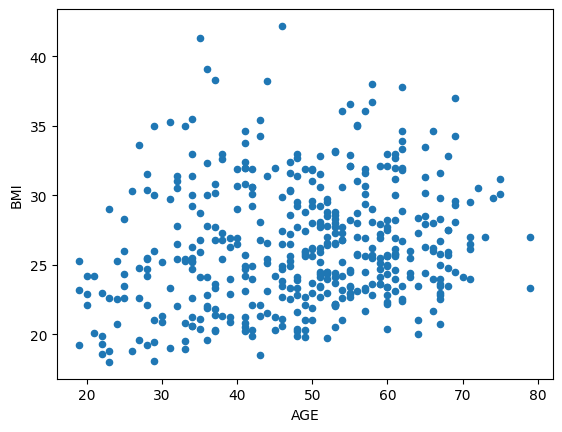

In [5]:
# Gráfica con los datos de estudio para visualización
colors = np.random.rand(50)
train.plot.scatter(x='AGE',y='BMI')
plt.show()

In [6]:
# Pintar una línea recta sobre los datos

# Obtener el mínimo de los datos
train['AGE'].min()

19

In [7]:
# Parámetros de la recta
# w / m / a
w = 0.210
b = 8.5

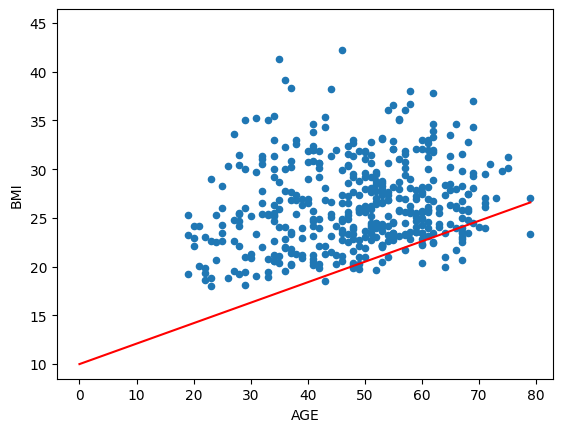

In [8]:
# Puntos de la recta
x = np.linspace(0,train['AGE'].max(),100)
y = w*x+10

# Gráfica de la recta
train.plot.scatter(x='AGE',y='BMI')
plt.plot(x, y, '-r')
plt.ylim(b,train['BMI'].max()*1.1)
plt.show()

In [9]:
# Calcular el error  con los parametros elegidos para el modelo

In [10]:
# Cálculo de las predicciones

#Pred = Train Dataset * w (125) + b (0)
train['pred'] = train['AGE']*w+b

In [11]:
# Cálculo de la función de error (ECM = Error Cuadrático Medio)
# Avg de errores al cuadrado, es decir, diff entre el estimador y lo que se estima
train['diff'] = train['pred']-train['BMI']
train['cuad'] = train['diff']**2
train.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y,pred,diff,cuad
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151,20.89,-11.21,125.6641
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75,18.58,-3.02,9.1204
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141,23.62,-6.88,47.3344
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206,13.54,-11.76,138.2976
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135,19.00,-4.00,16.0000


In [12]:
# Cálculo del valor ECM
train['cuad'].mean()

81.63470927601811

In [13]:
# Grid de la funcion de error basado en m, b=0
# Encontrar un W óptimo
w = np.linspace(50,200,50)
grid_error = pd.DataFrame(w, columns=['w'])
grid_error.head()

,w
0,50.000000
1,53.061224
2,56.122449
3,59.183673
4,62.244898


In [14]:
def sum_error(w, train):
    b=0
    train['pred'] = train['AGE']*w+b
    train['diff'] = train['pred']-train['BMI']
    train['cuad'] = train['diff']**2
    return(train['cuad'].mean())

In [15]:
grid_error['error']=grid_error['w'].apply(lambda x: sum_error(x, train=train))
grid_error.head()

,w,error
0,50.000000,6.185335e+06
1,53.061224,6.974202e+06
2,56.122449,7.810402e+06
3,59.183673,8.693934e+06
4,62.244898,9.624800e+06


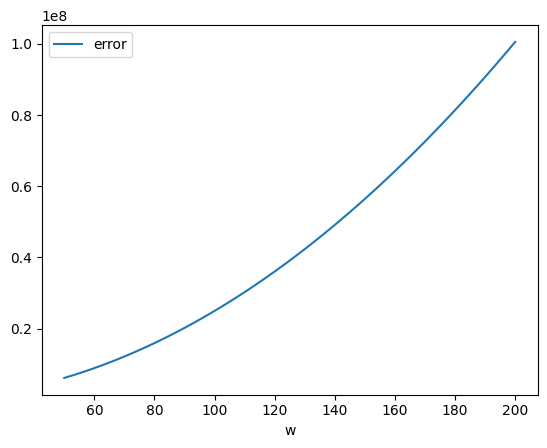

In [16]:
# Hallar el minimo
grid_error.plot(x='w',y='error')
plt.show()

In [17]:
# usando sklear para saber los valores optimos
from sklearn.linear_model import LinearRegression

# definiendo input y output
X_train = np.array(train['AGE']).reshape((-1, 1))
Y_train = np.array(train['BMI'])

# creando modelo
model = LinearRegression(fit_intercept=False)
model.fit(X_train, Y_train)

# imprimiendo parametros
print(f"intercepto (b): {model.intercept_}")
print(f"pendiente (w): {model.coef_}")

intercepto (b): 0.0
pendiente (w): [0.51095511]
